# **Google Data Analytics Capstone**

### **Case Study : How Can a Wellness Technology Company Play It Smart?**


**Case Study Introduction**

Urška Sršen and Sando Mur founded Bellabeat, a high-tech company to manufacture health-focused smart products. They use beutifully designed technology that informs and inspires women around the world by collecting data on activity, sleep, stress, and reproductive health.

The company has invested in traditional advertising media, such as radio out-of-home billboards, print, and television, but focuses on digital marketing extensively.

**Key Questions that are to be answered at the end of analysis -**

1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

**Deliverables:**

1. A clear summary of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of your analysis
5. Supporting visualizations and key findings
6. Your top high-level content recommendations based on your analysis.






---



## **Phase 1: ASK**


**1. The business task**

To analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart devices and to select one Bellabeat product to apply these insights in the analysis.

**2. Stake Holders :**


* Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
* Sando Mur: Mathematician, Bellabeat’s cofounder and key member of the Bellabeat executive team.
* Marketing analytics team : A team of data analysts guiding Bellabeat's marketing strategy.




---



## **Phase 2: PREPARE :**

**Data Source**

*   The data is publicly available on Kaggle (https://www.kaggle.com/arashnic/fitbit) : FitBit Fitness Tracker Data and stored in 18 csv files.
*   Features Included in the data,

   1.   Physical activity recorded in minutes
   2.   Heart rate
   3.   Sleep monitoring
   4.   Daily activity
   5.   Number of steps

*   Generated by respondents from a distributed survey via Amazon Mechanical Turk between 12 March 2016 to 12 May 2016.
*   30 FitBit users who consented to the submission of personal tracker data.








**ROCCC Features of the data** :

A good data source should ROCC.
ROCCC stands for Reliable, Original, Comprehensive, Current, and Cited.

1. Reliable - Not reliable as it only has 30 respondents.
2. Original - Generated by respondents from a distributed survey via Amazon Mechanical Turk. So can be considered as not very original.
3. Comprehensive - Features included in the data set, match most of Bellabeat's products' parameters. So data is Comprehensive.
4. Current - Data is 7 years old, so it is not current.
5. Cited - Data collected from third party, hence the citation and credibility are unknown.

The data quality cannot be considered as good as the data is not Reliable, not original, not Current and not Cited.

**Data Set Used:**

The following files from the available files is used for analysis. 

***dailyActivity_merged.csv***

This data set contains information about the ID of user and the details like DATE when the total steps,total distance,active minutes, sedentary minutes and the calories burned.


***WeightLogInfo_merged.csv***

This Dataset contains information about the user ID and the Weight in kg and pounds of user, BMI values.


***sleepDay_merged.csv***

This Dataset contains the featureslike User ID, SleepDay, TotalMinutesAsleep and the TotalTimeInBed.



---



## **Phase 3: PROCESS :**

Using Python to Import,Clean and Transform Data:

### **3.1 :** **Importing Data :**




In [ ]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [ ]:
# importing the csv file using read_csv function
daily_activity_merged = pd.read_csv("/content/sample_data/dailyActivity_merged.csv")

### **3.2 : Data cleaning and manipulation**

**3.2.1 : Observing the data in the rows and columns**

In [ ]:
# display first 10 rows with all columns
daily_activity_merged.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


**Note:**

***-> From above, we can see that names of the day are not mentioned. Only the dates are mentioned so we need to add the field of day name.***

***-> We do not have the number of hours column in the dataset,therefore we have add that column with total number of hours for every ID.***


**3.2.2 : checking whether there are any null or missing values in the dataset.**

In [ ]:
missing_values_count = daily_activity_merged.isnull().sum()
missing_values_count[:]

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

**Note:**

***-> From above, We can notice that There are no null values present in the dataset.***

**3.2.3 : Displaying Basic information of data**

In [ ]:
daily_activity_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

**Note:**

***->   By above, We can say that Data frame has 940 rows and 15 columns.***

***->  Here, the ActivityDate is classified as Object but it should be date type.***

**3.2.4 : Checking if there are any duplicate rows**



In [ ]:
duplicateRows = daily_activity_merged[daily_activity_merged.duplicated()]
duplicateRows

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories


**Note:**

***-> There are no duplicate rows when evaluated for the entire dataset.***

**3.2.5 Checking the unique ID column values to see if the data set has 30 IDs since it was mentioned we have 30 users in the data source.**

In [ ]:
distinct_id_count= len(daily_activity_merged["Id"].unique())
print("Number of unique Id's in dataset: " + str(distinct_id_count))

Number of unique Id's in dataset: 33


**Note:**

***-> We have 33 Unique ID's instead of 30.***

**Documentation Of Data Cleaning Steps To Be Done :**

1. ActivityDate is classified as Object but it should be date type.
2. The name of the day should be added in the dataset.
3. Rearranging the columns so that Activity_Day is beside Activity_Date.
4. The Total number of minutes column should be added.
5. Rearranging the columns so that the new column TotalMins is beside all the other minutes columns




### **Data Manipulation :**


**1. Converting ActivityDate from object to datatime64 dtype to the specified format as yyyy-mm-dd.**


In [ ]:
# converting "ActivityDate" to datatime64 dtype with the format to yyyy-mm-dd
daily_activity_merged["ActivityDate"] = pd.to_datetime(daily_activity_merged["ActivityDate"], format="%m/%d/%Y")

#check the column values
daily_activity_merged.head(5)


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [ ]:
#check if the type of column ActivityDate is converted
print(daily_activity_merged.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

**2. Creating new column to name the day of the week by using the date of the week column.**

In [ ]:
daily_activity_merged["ActivityDay"] = daily_activity_merged["ActivityDate"].dt.day_name()
#check the column values
daily_activity_merged.head(5)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActivityDay
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


**3. Rearranging the columns so that Activity_Day is beside Activity_Date.**

In [ ]:
daily_activity_merged.insert(2, 'ActivityDay', daily_activity_merged.pop('ActivityDay'))
daily_activity_merged

,Id,ActivityDate,ActivityDay,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,Tuesday,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,2016-04-13,Wednesday,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,2016-04-14,Thursday,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,2016-04-15,Friday,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,2016-04-16,Saturday,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,Sunday,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,2016-05-09,Monday,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,2016-05-10,Tuesday,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,2016-05-11,Wednesday,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


**4. The Total number of minutes column should be added.**

In [ ]:
# create new column "total_mins" containing sum of total minutes.
daily_activity_merged["TotalMins"] = daily_activity_merged["VeryActiveMinutes"] + daily_activity_merged["FairlyActiveMinutes"] + daily_activity_merged["LightlyActiveMinutes"] + daily_activity_merged["SedentaryMinutes"]
daily_activity_merged["TotalMins"].head(5)


0    1094
1    1033
2    1440
3     998
4    1040
Name: TotalMins, dtype: int64

In [ ]:
daily_activity_merged

,Id,ActivityDate,ActivityDay,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMins
0,1503960366,2016-04-12,Tuesday,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,1094
1,1503960366,2016-04-13,Wednesday,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,1033
2,1503960366,2016-04-14,Thursday,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,1440
3,1503960366,2016-04-15,Friday,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,998
4,1503960366,2016-04-16,Saturday,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,1040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,Sunday,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,1440
936,8877689391,2016-05-09,Monday,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,1440
937,8877689391,2016-05-10,Tuesday,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,1440
938,8877689391,2016-05-11,Wednesday,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,1440


**5. Rearranging the columns so that the new column TotalMins is beside all the other minutes columns**

In [ ]:
daily_activity_merged.insert(15, 'TotalMins', daily_activity_merged.pop('TotalMins'))
daily_activity_merged.head(5)

,Id,ActivityDate,ActivityDay,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalMins,Calories
0,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1094,1985
1,1503960366,2016-04-13,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1033,1797
2,1503960366,2016-04-14,Thursday,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1440,1776
3,1503960366,2016-04-15,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,998,1745
4,1503960366,2016-04-16,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1040,1863


Data cleaning and Data Manipulation phase is completed.

## **Phase 4: ANALYZE :**

Getting the different statistical values of the data set for the analysis which are mentioned below:
* count - no. of rows
* mean (average)
* std (standard deviation)
* min and max
* percentiles 25%, 50%, 75%

In [ ]:
daily_activity_merged.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalMins,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,1218.753191,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,265.931767,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,989.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,1440.000000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,1440.000000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,1440.000000,4900.000000



* Sedentary users are the majority logging on average 991 minutes in total average average 1218 minutes explained with the help of pie chart in share section.
* On an average, users logged 7,637 steps which is inadequate where the average daily to be walked should be 10,000 per day recommended by NIH(National Institutes Of Health) 
[Source : NIH-Govt-News](https://www.nih.gov/news-events/nih-research-matters/number-steps-day-more-important-step-intensity#:~:text=A%20goal%20of%2010%2C000%20steps,been%20done%20in%20older%20adults.)





In [ ]:
daily_activity_merged.corr()

<ipython-input-18-d4dbc3382c44>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  daily_activity_merged.corr()


,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalMins,Calories
Id,1.000000,0.185721,0.241000,0.238816,0.188015,0.308691,0.026665,0.019629,-0.015698,0.303608,0.051158,-0.098754,-0.043319,-0.048274,0.396671
TotalSteps,0.185721,1.000000,0.985369,0.984822,0.181849,0.740115,0.507105,0.692208,0.070505,0.667079,0.498693,0.569600,-0.327484,-0.017285,0.591568
TotalDistance,0.241000,0.985369,1.000000,0.999505,0.188332,0.794582,0.470758,0.662002,0.082389,0.681297,0.462899,0.516300,-0.288094,0.004523,0.644962
TrackerDistance,0.238816,0.984822,0.999505,1.000000,0.162585,0.794338,0.470277,0.661365,0.074591,0.680816,0.463154,0.514713,-0.289343,0.002416,0.645313
LoggedActivitiesDistance,0.188015,0.181849,0.188332,0.162585,1.000000,0.150852,0.076527,0.138302,0.154996,0.234443,0.053860,0.102135,-0.046999,0.021689,0.207595
VeryActiveDistance,0.308691,0.740115,0.794582,0.794338,0.150852,1.000000,0.192986,0.157669,0.046117,0.826681,0.211730,0.059845,-0.061754,0.072625,0.491959
ModeratelyActiveDistance,0.026665,0.507105,0.470758,0.470277,0.076527,0.192986,1.000000,0.237847,0.005793,0.225464,0.946934,0.162092,-0.221436,-0.085297,0.216790
LightActiveDistance,0.019629,0.692208,0.662002,0.661365,0.138302,0.157669,0.237847,1.000000,0.099503,0.154966,0.220129,0.885697,-0.413552,-0.069207,0.466917
SedentaryActiveDistance,-0.015698,0.070505,0.082389,0.074591,0.154996,0.046117,0.005793,0.099503,1.000000,0.008258,-0.022361,0.124185,0.035475,0.090510,0.043652
VeryActiveMinutes,0.303608,0.667079,0.681297,0.680816,0.234443,0.826681,0.225464,0.154966,0.008258,1.000000,0.312420,0.051926,-0.164671,-0.018244,0.615838


## **Phase 5: SHARE :**
Here, we are creating visualizations and communicating our findings based on our analysis.

**5.1 Showing Percentage of Sedentary Users Minutes out of Total Minutes.**

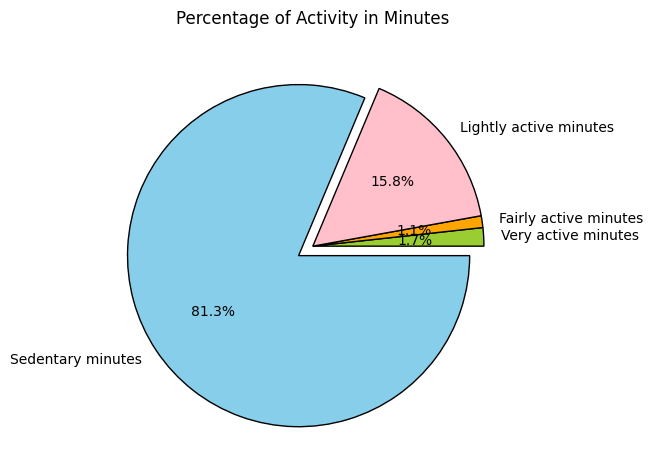

In [ ]:
# import packages
import matplotlib.pyplot as plt
import numpy as np

# calculating total of minutes columns for all users
very_active_mins = daily_activity_merged["VeryActiveMinutes"].sum()
fairly_active_mins = daily_activity_merged["FairlyActiveMinutes"].sum()
lightly_active_mins = daily_activity_merged["LightlyActiveMinutes"].sum()
sedentary_mins = daily_activity_merged["SedentaryMinutes"].sum()

# plotting pie chart
slices = [very_active_mins, fairly_active_mins, lightly_active_mins, sedentary_mins]
labels = ["Very active minutes", "Fairly active minutes", "Lightly active minutes", "Sedentary minutes"]
colours = ["yellowgreen","orange","pink","skyblue"]
explode = [0, 0, 0, 0.1]
plt.style.use("default")
plt.pie(slices, labels = labels, 
        colors = colours, wedgeprops = {"edgecolor": "black"}, 
        explode = explode, autopct = "%1.1f%%")
plt.title("Percentage of Activity in Minutes")
plt.tight_layout()
plt.show()

As seen from the above pie chart,

Sedentary minutes takes the biggest slice at 81.3%.

This indicates that users are using the FitBit app to log daily activities such as daily commute, inactive movements (moving from one spot to another) or running errands.

App is not particularly being used to track fitness (i.e for running or brisk walking) as per the minor percentage of fairly active activity (1.1%) and very active activity (1.7%). This is highly discouraging as FitBit app was developed to encourage fitness.

**5.2 : Number of Users logging in for different days of the week**

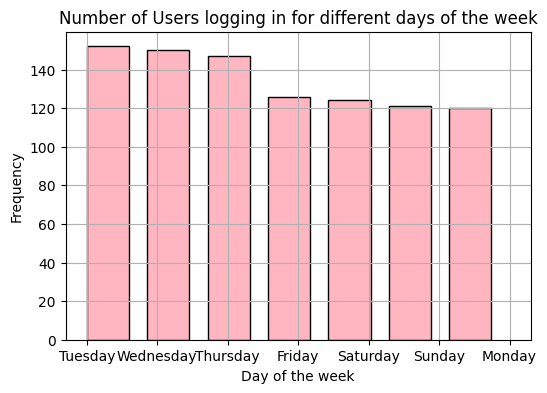

In [ ]:
# import matplotlib package
import matplotlib.pyplot as plt

# plotting histogram
plt.style.use("default")
plt.figure(figsize=(6,4)) # specify size of the chart
plt.hist(daily_activity_merged.ActivityDay, bins = 7, 
         width = 0.6, color = "lightpink", edgecolor = "black")

# adding annotations and visuals
plt.xlabel("Day of the week")
plt.ylabel("Frequency")
plt.title("Number of Users logging in for different days of the week")
plt.grid(True)
plt.show()

##### **Users tracking their activities across the week**

From the above histogram,

1. We discovered that users are mostly tracking their activity in the app during midweek from Tuesday to Friday. 

2. The number of users tracking their activity dropped on Friday and also dropped during weekends and Monday. 

# STEP 6: ACT

In this step, we will present our analysis report, deliver insights and few recommendations to the business problem.

**1. What are the trends identified?**

* Majority of the users who are using the FitBit app are using it to track sedentary activities and they are mostly not using it for tracking their health habits.

* Users track rate of the activities is more during weekdays as when compared to weekends. This may be due to the fact that they spend most of the time in their homes rather than going out.

**2. How could these trends apply to Bellabeat customers?**

From the famous saying "**HEALTH IS WEALTH**", by observing the trends identified it is keen that users are not giving much importance to health. Proper usage of  FitBit Fitness Trackers helps Bellabeat customers maintain their health,to track the daily activity thereby maintaining a balanced life style.

**3. How could these trends help influence Bellabeat marketing strategy?**
Bellabeat marketing team can run Health campaigns so as to make users aware about fitness and health.

As the users are mostly logging in during the weekdays and not much on weedays, Bellabeat app can prompt notification to encourage users to exercise more and keep a track on daily activities.

The app can also include the daily goals to be met(example : number of steps required to walk for a day) and how far the user is away to reach the goal(Remaining number of steps to be walked for that day).

Bellabeat app can also include different types of exercises (which can include simple exercises on weekdays and a more rigorous workouts on weekends) so that it can create more interest among users.